In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
data=pd.read_csv('C:/Users/user/Downloads/bank.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(11162, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [17]:

data.dropna
for x in data:
    null_values=data[x].isin(["unknown"]).sum()
    if null_values!=0:
        print(x,'=',null_values)
data.shape

job = 70
education = 497
contact = 2346
poutcome = 8326


(11162, 17)

In [18]:

data=data[data['job']!='unknown']
data=data[data['education']!='unknown']
data=data[data['contact']!='unknown']
data=data[data['poutcome']!='unknown']
data.shape

(2675, 17)

In [28]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
890,24,0,2,1,0,35,1,1,1,20,10,494,0,148,0,1,1
891,15,7,1,1,0,1209,1,0,1,20,10,132,0,73,3,0,1
951,35,5,1,2,0,1041,0,0,0,16,9,775,1,132,0,2,1
952,19,9,1,1,0,1326,1,0,0,16,9,805,1,153,3,0,1
953,27,2,1,1,0,606,0,1,0,16,9,587,1,108,1,0,1


In [19]:
data['deposit'].value_counts()

yes    1786
no      889
Name: deposit, dtype: int64

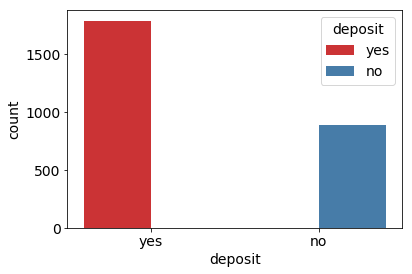

In [20]:
a=sns.countplot(x='deposit',data=data, hue="deposit",palette="Set1")

In [21]:
data["deposit"].value_counts()[0] / data.shape[0]

0.6676635514018692

In [22]:
data["deposit"].value_counts()[1] / data.shape[0]

0.33233644859813083

In [23]:
data.groupby('deposit').mean()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.179978,1371.298088,13.938133,221.258718,2.118110,227.157480,3.314961
yes,42.176932,2001.787794,14.688690,411.922172,1.788914,192.081747,3.289474


In [24]:
import numpy as np
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
890,24,0,2,1,0,35,1,1,1,20,10,494,0,148,0,1,1
891,15,7,1,1,0,1209,1,0,1,20,10,132,0,73,3,0,1
951,35,5,1,2,0,1041,0,0,0,16,9,775,1,132,0,2,1
952,19,9,1,1,0,1326,1,0,0,16,9,805,1,153,3,0,1
953,27,2,1,1,0,606,0,1,0,16,9,587,1,108,1,0,1


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
array = data.values
X = array[:,0:16]
Y = array[:,16]
rfe = RFE(model)
fit = rfe.fit(X, Y)
i=0
feature=list()
print('Num Features:',fit.n_features_)
for x,y in zip(fit.support_,data):
    if x:
        feature.append(y)
print("Feature Ranking:",fit.ranking_)
print("Selected Features:",feature)

Num Features: 8
Feature Ranking: [6 2 1 1 1 8 1 1 1 5 7 4 1 9 3 1]
Selected Features: ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome']


In [26]:
drop_elements = ['age','job','balance','day','month','duration','pdays','poutcome','deposit']
y = data["deposit"]
X = data.drop(drop_elements, axis=1)
X.head()

,marital,education,default,housing,loan,contact,campaign,previous
890,2,1,0,1,1,1,0,0
891,1,1,0,1,0,1,0,3
951,1,2,0,0,0,0,1,0
952,1,1,0,1,0,0,1,3
953,1,1,0,0,1,0,1,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.6672897196261682
